In [1]:
import numpy as np
from sklearn.datasets import load_digits, load_breast_cancer 
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
digits_data = load_digits()
breast_cancer_data = load_breast_cancer()

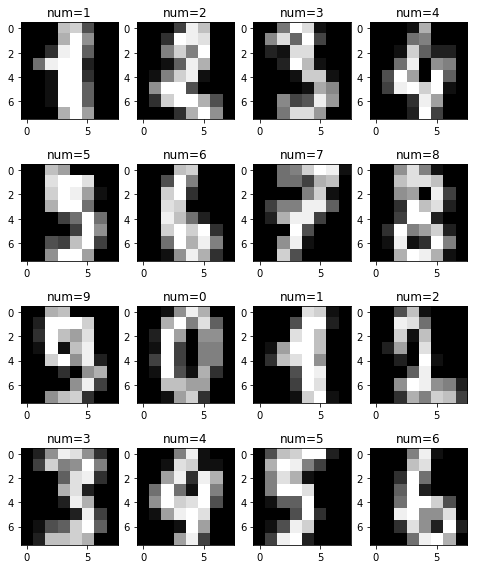

In [3]:
plt.figure(figsize(8, 10))

plt.gray()
rows = 4
cols = 4
plot_number = 0
for row in xrange(rows):
    for col in xrange(cols):
        plot_number += 1
        plt.subplot(rows, cols, plot_number)
        plt.title('num='+str(digits_data.target[plot_number]))
        plt.imshow(digits_data.images[plot_number])

In [4]:
breast_cancer_df = pd.DataFrame(np.hstack((breast_cancer_data.data, breast_cancer_data.target[:,np.newaxis])), columns=np.hstack((breast_cancer_data['feature_names'],['type'])))
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
def quality_CV(X, y):
    CV_scores = []
    estimators = [BernoulliNB(), MultinomialNB(), GaussianNB()]
    for estimator in estimators:
        CV_scores.append(cross_val_score(estimator, X, y).mean())
    print 'Bernoulli score =', CV_scores[0]
    print 'Multinomial score =', CV_scores[1]
    print 'Gaussian score =', CV_scores[2]
    return CV_scores

In [6]:
print 'Digits scoring\n'
digits_scores = quality_CV(digits_data.data, digits_data.target)
print '\nBreast cancer scoring\n'
breast_cancer_scores = quality_CV(breast_cancer_data.data, breast_cancer_data.target)

Digits scoring

Bernoulli score = 0.825823650778
Multinomial score = 0.870877148974
Gaussian score = 0.818600380355

Breast cancer scoring

Bernoulli score = 0.627420402859
Multinomial score = 0.894579040193
Gaussian score = 0.936749280609


In [7]:
with open('ans1.txt', 'w') as foutput:
    foutput.write(str(max(breast_cancer_scores)))
with open('ans2.txt', 'w') as foutput:
    foutput.write(str(max(digits_scores)))